In [1]:
!git clone https://github.com/bmalcover/image3D.git

Cloning into 'image3D'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 1), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), done.


Import Libraries

# **Pattern Matching**
Extracted from the OpenCV documentation:

OpenCV comes with a function matchTemplate for this purpose. It simply slides the template image over the input image and compares the template and patch of input image under the template image.

**Exercise**
Given the following image and the corresponding template, you have to paint a green dot in the center of as many diamonds as you can but minimizing the number of False Positives (false detections).

**Conditions:** You can't manipulate any image outside the program.

**Deadline:** Friday 7th, 19:00h

Load Images

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

In [8]:
def draw_dot_at_centre(loc, template, image):
  for pt in zip(*loc[::-1]):
      (startX, startY) = pt
      endX = startX + template.shape[1]
      endY = startY + template.shape[0]
      centreX = (startX + endX)/2
      centreY = (startY + endY)/2

      cv2.circle(image, (int(centreX), int(centreY)), 1, (0, 255, 0), 1)

In [9]:
def resize_image(image, scale_percent):
  # scale_percent = 220 # percent of original size
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  return resized_image

In [12]:
def template_matching(image, template, threshold):
  #Applying Gaussian blur to image to reduce noise.
  blur_image = cv2.GaussianBlur(image,(3,3),0)
  # #Converting image to grayscale
  blur_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

  #using small and large version of the template
  smallTemplate = template
  smallTemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  largeTemplate = resize_image(smallTemplate, 220)

  resLargeTemplate = cv2.matchTemplate(blur_image, largeTemplate, cv2.TM_CCOEFF_NORMED)
  resSmallTemplate = cv2.matchTemplate(blur_image, smallTemplate, cv2.TM_CCOEFF_NORMED)
  
  # Store the coordinates of matched area in a numpy array
  locLargeTemplate = np.where(resLargeTemplate >= threshold)
  locSmallTemplate = np.where(resSmallTemplate >= threshold)


  # Draw a circle in centre of the matched region.
  draw_dot_at_centre(locLargeTemplate, largeTemplate, image)
  draw_dot_at_centre(locSmallTemplate, smallTemplate, image)
  
  plt.imshow(image)
  plt.show()

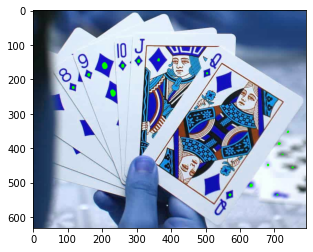

In [13]:
# Load images in the BGR space
img_rgb = cv2.imread("input/cards_mini.png")
template = cv2.imread("input/diamond.png")
 
# Show the final image with the matched area.
template_matching(img_rgb, template, 0.68)